Weather meta data - https://www.worldweatheronline.com/weather-api/api/docs/local-city-town-weather-api.aspx

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')


In [3]:
# file_path = '/content/drive/MyDrive/MLOps/all_merged_zones_weather_demand_data.csv'
# with open(file_path, 'r') as file:
#     content = file.read()



In [4]:
df_all = pd.read_csv('/Users/amoghagadde/Desktop/Amogha/Northeastern/SEM_3/ML_Ops/Project/mlops-project/dataset/data/demand_weather_data.csv')

In [5]:
df_all.head(5)

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,subba-name,value,value-units,zone
0,2019-01-01T00,36,11,356,4.2,0.2,89,5,3,1014,...,29,28,44,-2,29,1,ISNE - Maine,1509,megawatthours,4001
1,2019-01-01T00,40,9,356,2.5,0.1,97,10,6,1009,...,34,19,31,1,34,1,ISNE - Western/Central Mass.,2077,megawatthours,4007
2,2019-01-01T00,42,10,356,2.7,0.1,92,7,4,1013,...,37,28,45,3,37,1,ISNE - Southeast Mass.,1883,megawatthours,4006
3,2019-01-01T00,45,10,356,6.5,0.3,94,5,3,1012,...,40,25,40,4,40,1,ISNE - Rhode Island,983,megawatthours,4005
4,2019-01-01T00,44,8,356,5.1,0.2,96,5,3,1010,...,39,23,37,4,39,1,ISNE - Connecticut,3809,megawatthours,4004


In [6]:
max(df_all['datetime'])

'2024-01-01T00'

In [7]:
min(df_all['datetime'])

'2019-01-01T00'

So data is existing from June 5th,2019 (5:00pm) to Dec 31st,2023 (12:00 am)

In [8]:
df = df_all[df_all['datetime'] < '2022-12-31T23']

In [9]:
df.head()

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,subba-name,value,value-units,zone
0,2019-01-01T00,36,11,356,4.2,0.2,89,5,3,1014,...,29,28,44,-2,29,1,ISNE - Maine,1509,megawatthours,4001
1,2019-01-01T00,40,9,356,2.5,0.1,97,10,6,1009,...,34,19,31,1,34,1,ISNE - Western/Central Mass.,2077,megawatthours,4007
2,2019-01-01T00,42,10,356,2.7,0.1,92,7,4,1013,...,37,28,45,3,37,1,ISNE - Southeast Mass.,1883,megawatthours,4006
3,2019-01-01T00,45,10,356,6.5,0.3,94,5,3,1012,...,40,25,40,4,40,1,ISNE - Rhode Island,983,megawatthours,4005
4,2019-01-01T00,44,8,356,5.1,0.2,96,5,3,1010,...,39,23,37,4,39,1,ISNE - Connecticut,3809,megawatthours,4004


In [10]:
max(df['datetime'])

'2022-12-31T00'

In [11]:
min(df['datetime'])

'2019-01-01T00'

In [12]:
df.shape

(880297, 27)

Taking up six months data from 2019-06-05 to 2019-12-31

# Data Inspection

In [13]:
df.describe(include='all')

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,subba-name,value,value-units,zone
count,880297,880297.000000,880297.000000,880297.000000,880297.000000,880297.000000,880297.000000,880297.000000,880297.000000,880297.000000,...,880297.000000,880297.000000,880297.000000,880297.000000,880297.000000,880297.000000,880297,880297.000000,880297,880297
unique,34972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27,NaN,1,27
top,2021-07-01T00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Hudson Valley - NYIS,NaN,megawatthours,ZONG
freq,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,34979,NaN,880297,34979
mean,NaN,56.533763,8.312924,137.130122,0.130033,0.003862,68.567548,9.136268,5.397073,1016.353902,...,53.958022,14.380321,23.141295,12.664584,54.788903,2.611805,NaN,2791.042715,NaN,NaN
std,NaN,19.776715,4.303045,58.866537,0.554157,0.023222,19.426061,2.054206,1.347192,7.521376,...,22.739988,6.801307,10.943349,13.213729,23.774370,2.218020,NaN,3476.915314,NaN,NaN
min,NaN,-12.000000,0.000000,113.000000,0.000000,0.000000,4.000000,0.000000,0.000000,971.000000,...,-32.000000,0.000000,0.000000,-36.000000,-32.000000,1.000000,NaN,0.000000,NaN,NaN
25%,NaN,41.000000,5.000000,113.000000,0.000000,0.000000,55.000000,10.000000,6.000000,1012.000000,...,36.000000,9.000000,15.000000,2.000000,36.000000,1.000000,NaN,960.000000,NaN,NaN
50%,NaN,58.000000,8.000000,116.000000,0.000000,0.000000,71.000000,10.000000,6.000000,1016.000000,...,57.000000,13.000000,21.000000,14.000000,57.000000,1.000000,NaN,1502.000000,NaN,NaN
75%,NaN,72.000000,11.000000,122.000000,0.000000,0.000000,85.000000,10.000000,6.000000,1021.000000,...,72.000000,18.000000,30.000000,24.000000,75.000000,4.000000,NaN,2881.000000,NaN,NaN


In [14]:
df.dtypes

datetime            object
tempF                int64
windspeedMiles       int64
weatherCode          int64
precipMM           float64
precipInches       float64
humidity             int64
visibility           int64
visibilityMiles      int64
pressure             int64
pressureInches       int64
cloudcover           int64
HeatIndexC           int64
HeatIndexF           int64
DewPointC            int64
DewPointF            int64
WindChillC           int64
WindChillF           int64
WindGustMiles        int64
WindGustKmph         int64
FeelsLikeC           int64
FeelsLikeF           int64
uvIndex              int64
subba-name          object
value                int64
value-units         object
zone                object
dtype: object

In [15]:
df['value-units'].unique()

array(['megawatthours'], dtype=object)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 880297 entries, 0 to 1046356
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   datetime         880297 non-null  object 
 1   tempF            880297 non-null  int64  
 2   windspeedMiles   880297 non-null  int64  
 3   weatherCode      880297 non-null  int64  
 4   precipMM         880297 non-null  float64
 5   precipInches     880297 non-null  float64
 6   humidity         880297 non-null  int64  
 7   visibility       880297 non-null  int64  
 8   visibilityMiles  880297 non-null  int64  
 9   pressure         880297 non-null  int64  
 10  pressureInches   880297 non-null  int64  
 11  cloudcover       880297 non-null  int64  
 12  HeatIndexC       880297 non-null  int64  
 13  HeatIndexF       880297 non-null  int64  
 14  DewPointC        880297 non-null  int64  
 15  DewPointF        880297 non-null  int64  
 16  WindChillC       880297 non-null  int64  


# Handling missing values

In [17]:
df.isnull().sum()

datetime           0
tempF              0
windspeedMiles     0
weatherCode        0
precipMM           0
precipInches       0
humidity           0
visibility         0
visibilityMiles    0
pressure           0
pressureInches     0
cloudcover         0
HeatIndexC         0
HeatIndexF         0
DewPointC          0
DewPointF          0
WindChillC         0
WindChillF         0
WindGustMiles      0
WindGustKmph       0
FeelsLikeC         0
FeelsLikeF         0
uvIndex            0
subba-name         0
value              0
value-units        0
zone               0
dtype: int64

No missing values

In [18]:
df[df.duplicated()]

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,subba-name,value,value-units,zone
34760,2019-07-01T00,59,11,113,0.0,0.0,91,10,6,1009,...,59,18,29,15,59,1,ISNE - Maine,1387,megawatthours,4001
34761,2019-07-01T00,62,4,113,0.0,0.0,95,2,1,1012,...,62,11,18,16,62,1,ISNE - Western/Central Mass.,1911,megawatthours,4007
34762,2019-07-01T00,62,9,113,0.0,0.0,91,10,6,1010,...,62,13,21,16,62,1,ISNE - Southeast Mass.,1866,megawatthours,4006
34763,2019-07-01T00,61,7,113,0.0,0.0,93,10,6,1010,...,61,11,18,16,61,1,ISNE - Rhode Island,977,megawatthours,4005
34764,2019-07-01T00,62,7,113,0.0,0.0,90,10,6,1012,...,62,11,17,17,62,1,ISNE - Connecticut,3753,megawatthours,4004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011216,2022-07-01T00,81,12,113,0.0,0.0,50,10,6,1012,...,81,24,38,28,82,1,ERCO - North,1958,megawatthours,NRTH
1011217,2022-07-01T00,84,13,113,0.0,0.0,50,10,6,1013,...,84,19,30,30,86,1,ERCO - North Central,23580,megawatthours,NCEN
1011218,2022-07-01T00,81,14,113,0.0,0.0,44,10,6,1013,...,81,24,39,27,81,1,ERCO - Far West,5083,megawatthours,FWES
1011219,2022-07-01T00,77,9,122,0.0,0.0,84,9,5,1015,...,77,17,27,27,80,1,ERCO - East,2619,megawatthours,EAST


In [19]:
import pandas as pd

# Assuming 'df' is your DataFrame with a datetime index
# First, ensure the 'datetime' column is in datetime format and set it as the index
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Define the rolling window size (e.g., 6 hours). Adjust it based on your frequency (if data is hourly, 6 hours is window=6)
window_size = 6

# Compute rolling mean and standard deviation for 'tempF', 'windspeedMiles', and 'humidity'
df['tempF_rolling_mean'] = df['tempF'].rolling(window=window_size).mean()
df['tempF_rolling_std'] = df['tempF'].rolling(window=window_size).std()

df['windspeedMiles_rolling_mean'] = df['windspeedMiles'].rolling(window=window_size).mean()
df['windspeedMiles_rolling_std'] = df['windspeedMiles'].rolling(window=window_size).std()

df['humidity_rolling_mean'] = df['humidity'].rolling(window=window_size).mean()
df['humidity_rolling_std'] = df['humidity'].rolling(window=window_size).std()

# Display the resulting DataFrame with the new rolling statistics columns
(df[['tempF', 'tempF_rolling_mean', 'tempF_rolling_std', 'windspeedMiles', 'windspeedMiles_rolling_mean', 'windspeedMiles_rolling_std', 'humidity', 'humidity_rolling_mean', 'humidity_rolling_std']].head())


,tempF,tempF_rolling_mean,tempF_rolling_std,windspeedMiles,windspeedMiles_rolling_mean,windspeedMiles_rolling_std,humidity,humidity_rolling_mean,humidity_rolling_std
datetime,,,,,,,,,
2019-01-01,36,NaN,NaN,11,NaN,NaN,89,NaN,NaN
2019-01-01,40,NaN,NaN,9,NaN,NaN,97,NaN,NaN
2019-01-01,42,NaN,NaN,10,NaN,NaN,92,NaN,NaN
2019-01-01,45,NaN,NaN,10,NaN,NaN,94,NaN,NaN
2019-01-01,44,NaN,NaN,8,NaN,NaN,96,NaN,NaN


In [20]:
import pandas as pd


# Define the number of lags (e.g., 1 hour, 2 hours, etc.)
# You can create multiple lags depending on your needs


# Create lag features for 'tempF', 'windspeedMiles', and 'humidity' for 2 hrs
df['tempF_lag_2'] = df['tempF'].shift(2)
df['windspeedMiles_lag_2'] = df['windspeedMiles'].shift(2)
df['humidity_lag_2'] = df['humidity'].shift(2)

# Create lag features for 'tempF', 'windspeedMiles', and 'humidity' for 4 hrs
df['tempF_lag_4'] = df['tempF'].shift(4)
df['windspeedMiles_lag_4'] = df['windspeedMiles'].shift(4)
df['humidity_lag_4'] = df['humidity'].shift(4)

#Create lag features for 'tempF', 'windspeedMiles', and 'humidity' for 6 hrs
df['tempF_lag_6'] = df['tempF'].shift(6)
df['windspeedMiles_lag_6'] = df['windspeedMiles'].shift(6)
df['humidity_lag_6'] = df['humidity'].shift(6)

# Display the resulting DataFrame with the new lag features
(df[['tempF', 'tempF_lag_2', 'tempF_lag_4', 'tempF_lag_6','windspeedMiles', 'windspeedMiles_lag_2', 'windspeedMiles_lag_4','windspeedMiles_lag_6', 'humidity', 'humidity_lag_2', 'humidity_lag_4','humidity_lag_6']].head())


,tempF,tempF_lag_2,tempF_lag_4,tempF_lag_6,windspeedMiles,windspeedMiles_lag_2,windspeedMiles_lag_4,windspeedMiles_lag_6,humidity,humidity_lag_2,humidity_lag_4,humidity_lag_6
datetime,,,,,,,,,,,,
2019-01-01,36,NaN,NaN,NaN,11,NaN,NaN,NaN,89,NaN,NaN,NaN
2019-01-01,40,NaN,NaN,NaN,9,NaN,NaN,NaN,97,NaN,NaN,NaN
2019-01-01,42,36.0,NaN,NaN,10,11.0,NaN,NaN,92,89.0,NaN,NaN
2019-01-01,45,40.0,NaN,NaN,10,9.0,NaN,NaN,94,97.0,NaN,NaN
2019-01-01,44,42.0,36.0,NaN,8,10.0,11.0,NaN,96,92.0,89.0,NaN


In [21]:
# Count the number of NaN values in each column
nan_per_column = df.isna().sum()
print(nan_per_column)


tempF                          0
windspeedMiles                 0
weatherCode                    0
precipMM                       0
precipInches                   0
humidity                       0
visibility                     0
visibilityMiles                0
pressure                       0
pressureInches                 0
cloudcover                     0
HeatIndexC                     0
HeatIndexF                     0
DewPointC                      0
DewPointF                      0
WindChillC                     0
WindChillF                     0
WindGustMiles                  0
WindGustKmph                   0
FeelsLikeC                     0
FeelsLikeF                     0
uvIndex                        0
subba-name                     0
value                          0
value-units                    0
zone                           0
tempF_rolling_mean             5
tempF_rolling_std              5
windspeedMiles_rolling_mean    5
windspeedMiles_rolling_std     5
humidity_r

In [22]:
# Drop rows with any NaN values in the DataFrame
df_clean = df.dropna()

# Check the DataFrame after removing rows with NaN values
(df_clean.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 880291 entries, 2019-01-01 00:00:00 to 2022-12-31 00:00:00
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   tempF                        880291 non-null  int64  
 1   windspeedMiles               880291 non-null  int64  
 2   weatherCode                  880291 non-null  int64  
 3   precipMM                     880291 non-null  float64
 4   precipInches                 880291 non-null  float64
 5   humidity                     880291 non-null  int64  
 6   visibility                   880291 non-null  int64  
 7   visibilityMiles              880291 non-null  int64  
 8   pressure                     880291 non-null  int64  
 9   pressureInches               880291 non-null  int64  
 10  cloudcover                   880291 non-null  int64  
 11  HeatIndexC                   880291 non-null  int64  
 12  HeatIndexF              

In [23]:
# Reset the index to convert the 'datetime' index back to a normal column
df_clean.reset_index(inplace=True)

# Verify that 'datetime' is now a normal column
(df_clean.head())


,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,humidity_rolling_std,tempF_lag_2,windspeedMiles_lag_2,humidity_lag_2,tempF_lag_4,windspeedMiles_lag_4,humidity_lag_4,tempF_lag_6,windspeedMiles_lag_6,humidity_lag_6
0,2019-01-01 00:00:00,37,8,356,2.8,0.1,96,10,6,1012,...,4.833908,44.0,8.0,96.0,42.0,10.0,92.0,36.0,11.0,89.0
1,2019-01-01 00:00:00,40,12,356,3.1,0.1,95,2,1,1013,...,4.578937,34.0,11.0,84.0,45.0,10.0,94.0,40.0,9.0,97.0
2,2019-01-01 01:00:00,45,9,356,2.7,0.1,96,6,3,1008,...,4.722288,37.0,8.0,96.0,44.0,8.0,96.0,42.0,10.0,92.0
3,2019-01-01 01:00:00,46,11,356,3.4,0.1,94,6,3,1009,...,4.722288,40.0,12.0,95.0,34.0,11.0,84.0,45.0,10.0,94.0
4,2019-01-01 01:00:00,37,8,356,2.9,0.1,97,9,5,1009,...,4.844241,45.0,9.0,96.0,37.0,8.0,96.0,44.0,8.0,96.0


In [24]:
df_clean.shape

(880291, 42)

In [25]:
# Step 1: Extract the month from the 'datetime' column
df_clean['datetime'] = pd.to_datetime(df_clean['datetime'])
df_clean['month'] = df_clean['datetime'].dt.month

In [26]:
df_clean['month_sin'] = np.round(np.sin(2 * np.pi * df_clean['month'] / 12), decimals=6)
df_clean['month_cos'] = np.round(np.cos(2 * np.pi * df_clean['month'] / 12), decimals=6)



In [27]:
df_clean.head()

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,humidity_lag_2,tempF_lag_4,windspeedMiles_lag_4,humidity_lag_4,tempF_lag_6,windspeedMiles_lag_6,humidity_lag_6,month,month_sin,month_cos
0,2019-01-01 00:00:00,37,8,356,2.8,0.1,96,10,6,1012,...,96.0,42.0,10.0,92.0,36.0,11.0,89.0,1,0.5,0.866025
1,2019-01-01 00:00:00,40,12,356,3.1,0.1,95,2,1,1013,...,84.0,45.0,10.0,94.0,40.0,9.0,97.0,1,0.5,0.866025
2,2019-01-01 01:00:00,45,9,356,2.7,0.1,96,6,3,1008,...,96.0,44.0,8.0,96.0,42.0,10.0,92.0,1,0.5,0.866025
3,2019-01-01 01:00:00,46,11,356,3.4,0.1,94,6,3,1009,...,95.0,34.0,11.0,84.0,45.0,10.0,94.0,1,0.5,0.866025
4,2019-01-01 01:00:00,37,8,356,2.9,0.1,97,9,5,1009,...,96.0,37.0,8.0,96.0,44.0,8.0,96.0,1,0.5,0.866025


month_cos and month_sin

This approach keeps December close to January, which makes more sense for features that repeat cyclically.

In [28]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Normalize numerical columns except 'month', 'month_sin', and 'month_cos'
columns_to_normalize = df_clean.select_dtypes(include=[np.number]).columns.difference(['month', 'month_sin', 'month_cos'])
df_clean[columns_to_normalize] = df_clean[columns_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Shift 'month_cos' to non-negative range by adjusting to [0, 1]
df_clean['month_cos'] = (df_clean['month_cos'] + 1) / 2
df_clean['month_sin'] = (df_clean['month_sin'] + 1) / 2

# Convert categorical columns with mixed types to strings
for col in df_clean.select_dtypes(include=['object']).columns:
    if col != 'datetime':  # Skip 'datetime' as it's not categorical for encoding
        df_clean[col] = df_clean[col].astype(str)  # Convert to string to handle mixed types
        le = LabelEncoder()
        df_clean[col] = le.fit_transform(df_clean[col])

# Display the processed DataFrame
df_clean.head()

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,humidity_lag_2,tempF_lag_4,windspeedMiles_lag_4,humidity_lag_4,tempF_lag_6,windspeedMiles_lag_6,humidity_lag_6,month,month_sin,month_cos
0,2019-01-01 00:00:00,0.392,0.216216,0.94186,0.133333,0.125,0.958333,1.0,1.000000,0.561644,...,0.958333,0.432,0.270270,0.916667,0.384,0.297297,0.885417,1,0.75,0.933013
1,2019-01-01 00:00:00,0.416,0.324324,0.94186,0.147619,0.125,0.947917,0.2,0.166667,0.575342,...,0.833333,0.456,0.270270,0.937500,0.416,0.243243,0.968750,1,0.75,0.933013
2,2019-01-01 01:00:00,0.456,0.243243,0.94186,0.128571,0.125,0.958333,0.6,0.500000,0.506849,...,0.958333,0.448,0.216216,0.958333,0.432,0.270270,0.916667,1,0.75,0.933013
3,2019-01-01 01:00:00,0.464,0.297297,0.94186,0.161905,0.125,0.937500,0.6,0.500000,0.520548,...,0.947917,0.368,0.297297,0.833333,0.456,0.270270,0.937500,1,0.75,0.933013
4,2019-01-01 01:00:00,0.392,0.216216,0.94186,0.138095,0.125,0.968750,0.9,0.833333,0.520548,...,0.958333,0.392,0.216216,0.958333,0.448,0.216216,0.958333,1,0.75,0.933013


# Visualizations and Feature selection

In [29]:
df_clean.head()

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,humidity_lag_2,tempF_lag_4,windspeedMiles_lag_4,humidity_lag_4,tempF_lag_6,windspeedMiles_lag_6,humidity_lag_6,month,month_sin,month_cos
0,2019-01-01 00:00:00,0.392,0.216216,0.94186,0.133333,0.125,0.958333,1.0,1.000000,0.561644,...,0.958333,0.432,0.270270,0.916667,0.384,0.297297,0.885417,1,0.75,0.933013
1,2019-01-01 00:00:00,0.416,0.324324,0.94186,0.147619,0.125,0.947917,0.2,0.166667,0.575342,...,0.833333,0.456,0.270270,0.937500,0.416,0.243243,0.968750,1,0.75,0.933013
2,2019-01-01 01:00:00,0.456,0.243243,0.94186,0.128571,0.125,0.958333,0.6,0.500000,0.506849,...,0.958333,0.448,0.216216,0.958333,0.432,0.270270,0.916667,1,0.75,0.933013
3,2019-01-01 01:00:00,0.464,0.297297,0.94186,0.161905,0.125,0.937500,0.6,0.500000,0.520548,...,0.947917,0.368,0.297297,0.833333,0.456,0.270270,0.937500,1,0.75,0.933013
4,2019-01-01 01:00:00,0.392,0.216216,0.94186,0.138095,0.125,0.968750,0.9,0.833333,0.520548,...,0.958333,0.392,0.216216,0.958333,0.448,0.216216,0.958333,1,0.75,0.933013


## Average demand by Location

In [30]:
subba_group = df_clean.groupby('subba-name')

In [31]:
avg_demand_subba = subba_group['value'].mean().sort_values(ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, '7'),
  Text(1, 0, '3'),
  Text(2, 0, '9'),
  Text(3, 0, '24'),
  Text(4, 0, '5'),
  Text(5, 0, '8'),
  Text(6, 0, '13'),
  Text(7, 0, '16'),
  Text(8, 0, '21'),
  Text(9, 0, '20'),
  Text(10, 0, '1'),
  Text(11, 0, '4'),
  Text(12, 0, '26'),
  Text(13, 0, '18'),
  Text(14, 0, '10'),
  Text(15, 0, '0'),
  Text(16, 0, '14'),
  Text(17, 0, '15'),
  Text(18, 0, '11'),
  Text(19, 0, '6'),
  Text(20, 0, '12'),
  Text(21, 0, '17'),
  Text(22, 0, '23'),
  Text(23, 0, '2'),
  Text(24, 0, '25'),
  Text(25, 0, '19'),
  Text(26, 0, '22')])

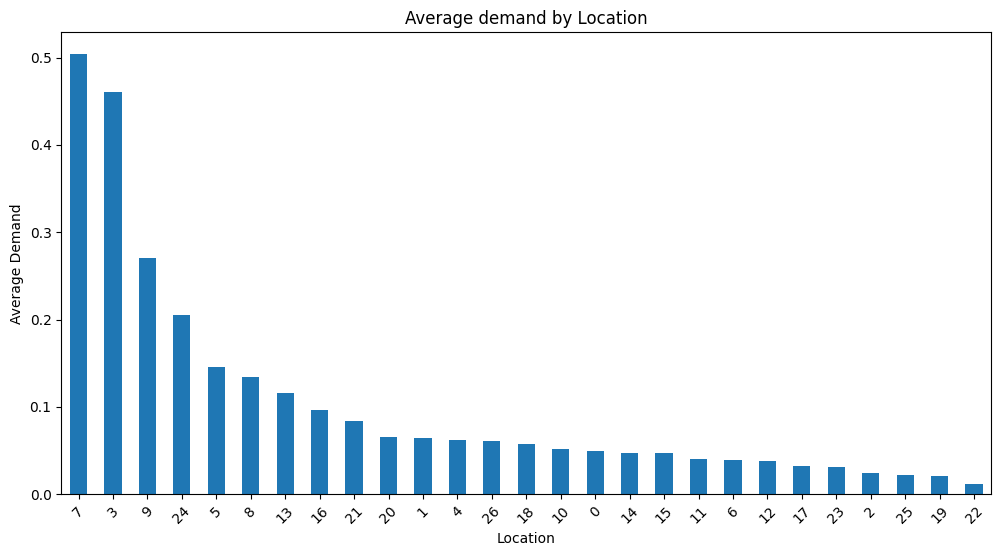

In [32]:
plt.figure(figsize=(12,6))
avg_demand_subba.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Average Demand')
plt.title('Average demand by Location')
plt.xticks(rotation = 45)

## Average Demand per Month

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

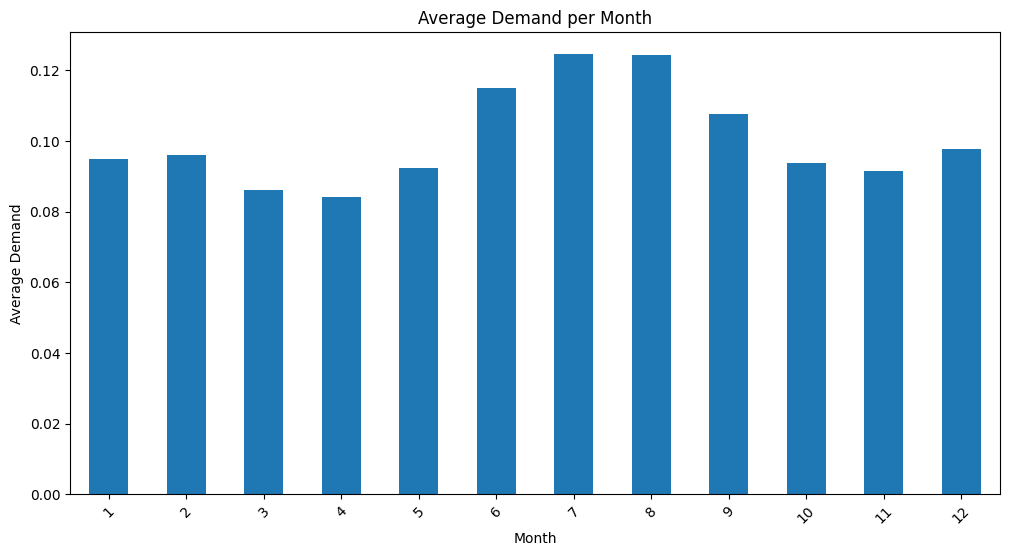

In [33]:
month_demand_group = df_clean.groupby('month')
avg_demand_month = month_demand_group['value'].mean()

plt.figure(figsize = (12,6))
avg_demand_month.plot(kind = 'bar')
plt.xlabel('Month')
plt.ylabel('Average Demand')
plt.title('Average Demand per Month')
plt.xticks(rotation = 45)

# **Feature Selection**

## Correlation between Weather Factors and Demand Value

In [34]:
df_clean.columns

Index(['datetime', 'tempF', 'windspeedMiles', 'weatherCode', 'precipMM',
       'precipInches', 'humidity', 'visibility', 'visibilityMiles', 'pressure',
       'pressureInches', 'cloudcover', 'HeatIndexC', 'HeatIndexF', 'DewPointC',
       'DewPointF', 'WindChillC', 'WindChillF', 'WindGustMiles',
       'WindGustKmph', 'FeelsLikeC', 'FeelsLikeF', 'uvIndex', 'subba-name',
       'value', 'value-units', 'zone', 'tempF_rolling_mean',
       'tempF_rolling_std', 'windspeedMiles_rolling_mean',
       'windspeedMiles_rolling_std', 'humidity_rolling_mean',
       'humidity_rolling_std', 'tempF_lag_2', 'windspeedMiles_lag_2',
       'humidity_lag_2', 'tempF_lag_4', 'windspeedMiles_lag_4',
       'humidity_lag_4', 'tempF_lag_6', 'windspeedMiles_lag_6',
       'humidity_lag_6', 'month', 'month_sin', 'month_cos'],
      dtype='object')

In [35]:
df_clean.drop(columns=['month'], inplace=True)


In [36]:
df_clean.columns

Index(['datetime', 'tempF', 'windspeedMiles', 'weatherCode', 'precipMM',
       'precipInches', 'humidity', 'visibility', 'visibilityMiles', 'pressure',
       'pressureInches', 'cloudcover', 'HeatIndexC', 'HeatIndexF', 'DewPointC',
       'DewPointF', 'WindChillC', 'WindChillF', 'WindGustMiles',
       'WindGustKmph', 'FeelsLikeC', 'FeelsLikeF', 'uvIndex', 'subba-name',
       'value', 'value-units', 'zone', 'tempF_rolling_mean',
       'tempF_rolling_std', 'windspeedMiles_rolling_mean',
       'windspeedMiles_rolling_std', 'humidity_rolling_mean',
       'humidity_rolling_std', 'tempF_lag_2', 'windspeedMiles_lag_2',
       'humidity_lag_2', 'tempF_lag_4', 'windspeedMiles_lag_4',
       'humidity_lag_4', 'tempF_lag_6', 'windspeedMiles_lag_6',
       'humidity_lag_6', 'month_sin', 'month_cos'],
      dtype='object')

In [37]:
df_clean.dtypes

datetime                       datetime64[ns]
tempF                                 float64
windspeedMiles                        float64
weatherCode                           float64
precipMM                              float64
precipInches                          float64
humidity                              float64
visibility                            float64
visibilityMiles                       float64
pressure                              float64
pressureInches                        float64
cloudcover                            float64
HeatIndexC                            float64
HeatIndexF                            float64
DewPointC                             float64
DewPointF                             float64
WindChillC                            float64
WindChillF                            float64
WindGustMiles                         float64
WindGustKmph                          float64
FeelsLikeC                            float64
FeelsLikeF                        

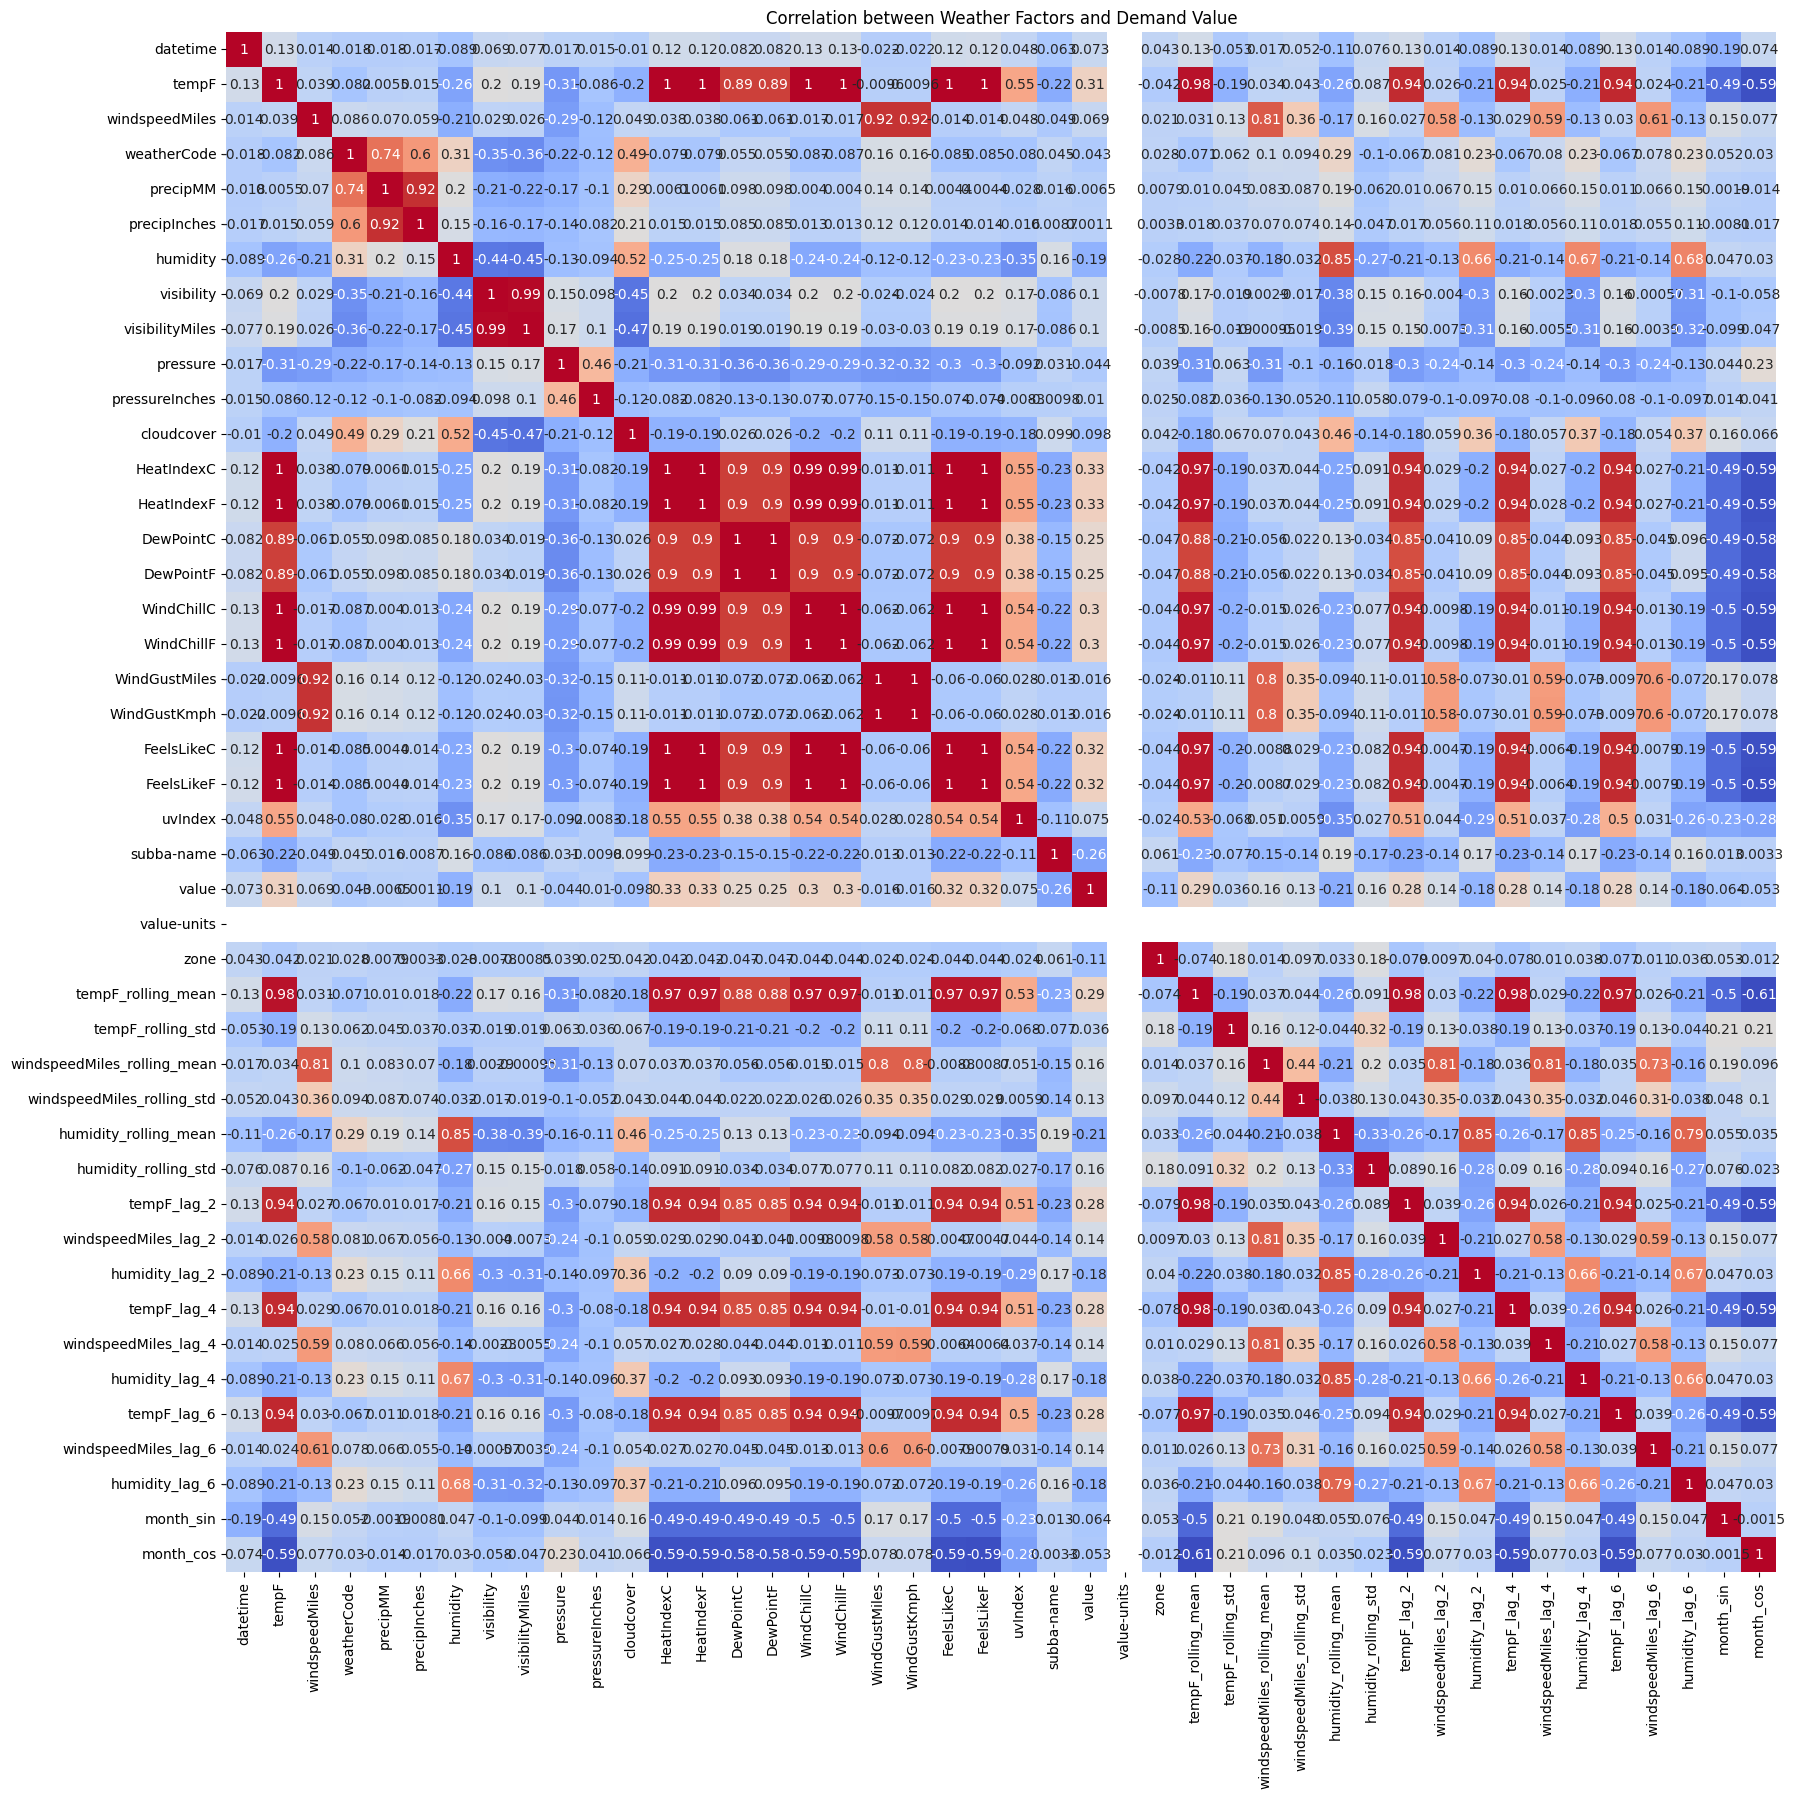

In [38]:
# Calculate the correlation matrix
weather_corr = df_clean.corr()

# Plot the correlation heatmap
plt.figure(figsize=(20,20))
sns.heatmap(weather_corr, annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation between Weather Factors and Demand Value')
plt.show()


In [39]:
# Step 1: Find pairs of features with correlation > 0.7
threshold = 0.7
high_corr_pairs = [(weather_corr.columns[i], weather_corr.columns[j], weather_corr.iloc[i, j])
                   for i in range(len(weather_corr.columns)) for j in range(i)
                   if abs(weather_corr.iloc[i, j]) > threshold]

# Step 2: Evaluate how each feature in the pair is correlated with 'value'
print("Highly correlated feature pairs and their correlation with 'value':")
for feature1, feature2, corr_value in high_corr_pairs:
    corr_feature1_value = weather_corr.loc[feature1, 'value']
    corr_feature2_value = weather_corr.loc[feature2, 'value']
    print(f"Pair: {feature1} and {feature2} - Correlation: {corr_value:.2f}")
    print(f"  {feature1} with 'value': {corr_feature1_value:.2f}")
    print(f"  {feature2} with 'value': {corr_feature2_value:.2f}")

    # Compare correlations with 'value' and suggest which to keep
    if abs(corr_feature1_value) > abs(corr_feature2_value):
        print(f"  => {feature1} is more correlated with 'value', consider keeping it.")
    else:
        print(f"  => {feature2} is more correlated with 'value', consider keeping it.")
    print('-' * 80)

Highly correlated feature pairs and their correlation with 'value':
Pair: precipMM and weatherCode - Correlation: 0.74
  precipMM with 'value': -0.01
  weatherCode with 'value': -0.04
  => weatherCode is more correlated with 'value', consider keeping it.
--------------------------------------------------------------------------------
Pair: precipInches and precipMM - Correlation: 0.92
  precipInches with 'value': 0.00
  precipMM with 'value': -0.01
  => precipMM is more correlated with 'value', consider keeping it.
--------------------------------------------------------------------------------
Pair: visibilityMiles and visibility - Correlation: 0.99
  visibilityMiles with 'value': 0.10
  visibility with 'value': 0.10
  => visibility is more correlated with 'value', consider keeping it.
--------------------------------------------------------------------------------
Pair: HeatIndexC and tempF - Correlation: 1.00
  HeatIndexC with 'value': 0.33
  tempF with 'value': 0.31
  => HeatIndexC

Looking at the plot - it can be decided to drop
1. 'DewPointF', 'WindChillF', 'HeatIndexF', 'FeelsLikeF' and 'tempF' - are highly correlated
2. 'windspeedMiles' and 'WindGustMiles' are also highly correlated with each other

Considering how they are correlated with the target variable ('Value') - we will drop few features

Should look into ERCO - Far West

## Variance Inflation Factor (VIF)

In [40]:
from statsmodels.stats. outliers_influence import variance_inflation_factor

features = df_clean.drop(columns=['value', 'datetime'])
vif_data = pd.DataFrame()
vif_data['features'] = features.columns

vif_data['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

vif_data

,features,VIF
0,tempF,15428.311498
1,windspeedMiles,42.572568
2,weatherCode,3.506335
3,precipMM,11.480430
4,precipInches,7.927008
5,humidity,130.560601
6,visibility,995.211120
7,visibilityMiles,848.901412
8,pressure,57.105525
9,pressureInches,45.592031


1. Very High VIF - tempF, HeatIndexF, WindChillF, FeelsLikeF
2. Moderate VIF - windspeedMiles, humidity, visibilityMiles,pressure, DewPointF, WindGustMiles
3. Low VIF - precipMM, cloudcover, uvindex


So the columns initially which can be considered are - 'datetime', 'tempF', 'windspeedMiles', 'precipMM', 'humidity', 'visibilityMiles', 'pressure', 'cloudcover', 'HeatIndexF', 'DewPointF', 'WindChillF', 'WindGustMiles', 'FeelsLikeF', 'uvIndex', 'subba-name','value', 'value-units', 'zone', 'Month' - Dropping selected columns as few features are captured in different units


The rest few columns to be dropped is yet to be decided based on other factors

In [41]:
df_clean.head()

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,windspeedMiles_lag_2,humidity_lag_2,tempF_lag_4,windspeedMiles_lag_4,humidity_lag_4,tempF_lag_6,windspeedMiles_lag_6,humidity_lag_6,month_sin,month_cos
0,2019-01-01 00:00:00,0.392,0.216216,0.94186,0.133333,0.125,0.958333,1.0,1.000000,0.561644,...,0.216216,0.958333,0.432,0.270270,0.916667,0.384,0.297297,0.885417,0.75,0.933013
1,2019-01-01 00:00:00,0.416,0.324324,0.94186,0.147619,0.125,0.947917,0.2,0.166667,0.575342,...,0.297297,0.833333,0.456,0.270270,0.937500,0.416,0.243243,0.968750,0.75,0.933013
2,2019-01-01 01:00:00,0.456,0.243243,0.94186,0.128571,0.125,0.958333,0.6,0.500000,0.506849,...,0.216216,0.958333,0.448,0.216216,0.958333,0.432,0.270270,0.916667,0.75,0.933013
3,2019-01-01 01:00:00,0.464,0.297297,0.94186,0.161905,0.125,0.937500,0.6,0.500000,0.520548,...,0.324324,0.947917,0.368,0.297297,0.833333,0.456,0.270270,0.937500,0.75,0.933013
4,2019-01-01 01:00:00,0.392,0.216216,0.94186,0.138095,0.125,0.968750,0.9,0.833333,0.520548,...,0.243243,0.958333,0.392,0.216216,0.958333,0.448,0.216216,0.958333,0.75,0.933013


In [42]:
df_clean['value-units'].value_counts()

value-units
0    880291
Name: count, dtype: int64

In [43]:
column_names = df_clean.columns.tolist()
print(column_names)

['datetime', 'tempF', 'windspeedMiles', 'weatherCode', 'precipMM', 'precipInches', 'humidity', 'visibility', 'visibilityMiles', 'pressure', 'pressureInches', 'cloudcover', 'HeatIndexC', 'HeatIndexF', 'DewPointC', 'DewPointF', 'WindChillC', 'WindChillF', 'WindGustMiles', 'WindGustKmph', 'FeelsLikeC', 'FeelsLikeF', 'uvIndex', 'subba-name', 'value', 'value-units', 'zone', 'tempF_rolling_mean', 'tempF_rolling_std', 'windspeedMiles_rolling_mean', 'windspeedMiles_rolling_std', 'humidity_rolling_mean', 'humidity_rolling_std', 'tempF_lag_2', 'windspeedMiles_lag_2', 'humidity_lag_2', 'tempF_lag_4', 'windspeedMiles_lag_4', 'humidity_lag_4', 'tempF_lag_6', 'windspeedMiles_lag_6', 'humidity_lag_6', 'month_sin', 'month_cos']


In [44]:
selected_df = df_clean[[
    'precipMM',
    'weatherCode',
    'visibility',
    'HeatIndexF',
    'WindChillF',
    'windspeedMiles',
    'FeelsLikeF',
    'tempF_rolling_mean',
    'windspeedMiles_rolling_mean',
    'humidity_rolling_mean',
    'value',
    'pressure',
    'pressureInches',
    'cloudcover',
    'uvIndex',
    'subba-name',
    'zone',
    'tempF_rolling_std',
    'windspeedMiles_rolling_std',
    'humidity_rolling_std',
    'month_sin',
    'month_cos'
]]





In [45]:
selected_df.head()

,precipMM,weatherCode,visibility,HeatIndexF,WindChillF,windspeedMiles,FeelsLikeF,tempF_rolling_mean,windspeedMiles_rolling_mean,humidity_rolling_mean,...,pressureInches,cloudcover,uvIndex,subba-name,zone,tempF_rolling_std,windspeedMiles_rolling_std,humidity_rolling_std,month_sin,month_cos
0,0.133333,0.94186,1.0,0.374046,0.427586,0.216216,0.410596,0.401189,0.327044,0.924125,...,0.5,1.0,0.0,15,1,0.141909,0.105025,0.112895,0.75,0.933013
1,0.147619,0.94186,0.2,0.396947,0.448276,0.324324,0.430464,0.401189,0.345912,0.920233,...,0.5,1.0,0.0,16,7,0.141909,0.138936,0.106940,0.75,0.933013
2,0.128571,0.94186,0.6,0.435115,0.496552,0.243243,0.476821,0.405646,0.339623,0.928016,...,0.5,1.0,0.0,13,3,0.155188,0.141616,0.110288,0.75,0.933013
3,0.161905,0.94186,0.6,0.442748,0.503448,0.297297,0.483444,0.407132,0.345912,0.928016,...,0.5,1.0,0.0,17,4,0.161709,0.149370,0.110288,0.75,0.933013
4,0.138095,0.94186,0.9,0.374046,0.434483,0.216216,0.417219,0.396731,0.345912,0.929961,...,0.5,1.0,0.0,15,1,0.160893,0.149370,0.113136,0.75,0.933013


In [46]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = selected_df.drop('value', axis=1)  # Features (drop the target column 'value')
y = selected_df['value']  # Target variable (the 'value' column)

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the splits
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)



Training set: (704232, 21) (704232,)
Test set: (176059, 21) (176059,)


# Model Building and Training

In [50]:
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature
from urllib.parse import urlparse


# Setting MLflow tracking URI
mlflow.set_tracking_uri("http://localhost:5001")

# Experiment name
mlflow.set_experiment("Electricity Demand Prediction")

2024/10/27 00:57:33 INFO mlflow.tracking.fluent: Experiment with name 'Electricity Demand Prediction' does not exist. Creating a new experiment.


<Experiment: artifact_location='/Users/amoghagadde/Desktop/Amogha/Northeastern/SEM_3/ML_Ops/Project/mlops-project/mlruns/1', creation_time=1730005053701, experiment_id='1', last_update_time=1730005053701, lifecycle_stage='active', name='Electricity Demand Prediction', tags={}>

Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Linear Regression Tracking
with mlflow.start_run(run_name="Linear Regression") as run:
    
    # Debugging: Check active run
    print(f"Active run_id: {run.info.run_id}")
    
    # Initialize the Linear Regression model
    lin_reg = LinearRegression()

    # Fit the model on the training data
    lin_reg.fit(X_train, y_train)

    # Make predictions on the test data
    y_test_pred = lin_reg.predict(X_test)
    
    # Evaluate model performance
    mse = mean_squared_error(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)

    # Evaluate the model on the test set
    print("Linear Regression Test Set Metrics:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared (R²):", r2)
    
    # Logging parameters, metrics, and model
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("R2", r2)
    #mlflow.sklearn.log_model(lin_reg, "Linear Regression model")
    
    # Debugging: Tracking URI to ensure it's set correctly
    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme
    print("Tracking URL type: ", tracking_url_type_store)
     
    # Infer signature
    predictions_lin = lin_reg.predict(X_train)
    signature_lin = infer_signature(X_train, predictions_lin)

    # Logging the model with signature
    mlflow.sklearn.log_model(lin_reg, "Linear Regression model", signature=signature_lin)
    
    # Debugging: Confirm run status
    print(f"Run {run.info.run_id} finished successfully!")
    
    


Active run_id: 16ccc91186e04106a6c977d02812052c
Linear Regression Test Set Metrics:
Mean Squared Error (MSE): 0.011129556429854302
Mean Absolute Error (MAE): 0.06981081181408984
R-squared (R²): 0.29886616651696085
Tracking URL type:  http


2024/10/27 00:58:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Linear Regression at: http://localhost:5001/#/experiments/1/runs/16ccc91186e04106a6c977d02812052c.
2024/10/27 00:58:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/1.


Run 16ccc91186e04106a6c977d02812052c finished successfully!


Lasso Regression

In [52]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Lasso Regression Tracking
with mlflow.start_run(run_name="Lasso Regression") as run:
    
    # Debugging: Check active run
    print(f"Active run_id: {run.info.run_id}")

    # Initialize the Lasso model with an alpha (regularization strength)
    lasso_reg = Lasso(alpha=0.1)

    # Fit the model on the training data
    lasso_reg.fit(X_train, y_train)

    # Make predictions on the test data
    y_test_pred = lasso_reg.predict(X_test)
    
    # Evaluate model performance
    mse = mean_squared_error(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)

    # Evaluate the model on the test set
    print("Lasso Regression Test Set Metrics:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared (R²):", r2)
    
    # Logging the alpha parameter for Lasso
    mlflow.log_param("alpha", 0.1)

    # Logging metrics and model
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("R2", r2)
    #mlflow.sklearn.log_model(lasso_reg, "Lasso Regression model")
    
    # Debugging: Tracking URI to ensure it's set correctly
    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme
    print("Tracking URL type: ", tracking_url_type_store)
    
    # Infer signature
    predictions_lasso = lasso_reg.predict(X_train)
    signature_lasso = infer_signature(X_train, predictions_lasso)

    # Logging the model with signature
    mlflow.sklearn.log_model(lasso_reg, "Lasso Regression model", signature=signature_lasso)
    
    # Debugging: Confirm run status
    print(f"Run {run.info.run_id} finished successfully!")


Active run_id: bbc4443aabb24199a367b6c1f45ebd12
Lasso Regression Test Set Metrics:
Mean Squared Error (MSE): 0.014928346790568847
Mean Absolute Error (MAE): 0.07935168079522162
R-squared (R²): 0.05955200651489201
Tracking URL type:  http
Run bbc4443aabb24199a367b6c1f45ebd12 finished successfully!


2024/10/27 00:59:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Lasso Regression at: http://localhost:5001/#/experiments/1/runs/bbc4443aabb24199a367b6c1f45ebd12.
2024/10/27 00:59:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/1.


LSTM (Vanilla)

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [54]:
X_train = X_train.to_numpy().reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.to_numpy().reshape((X_test.shape[0], 1, X_test.shape[1]))

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
# lstm_model = Sequential()
# lstm_model.add(LSTM(50, activation = 'relu', input_shape = (1, X.shape[1])))
# lstm_model.add(Dense(1))
# lstm_model.compile(optimizer = 'adam', loss = 'mse')

# lstm_model.fit(X_train, y_train, epochs = 200, verbose = 1)

# y_test_pred = lstm_model.predict(X_test)

# # Evaluate the model on the test set
# print("LSTM Model Test Set Metrics:")
# print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
# print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
# print("R-squared (R²):", r2_score(y_test, y_test_pred))

In [55]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (704232, 1, 21)
X_test shape: (176059, 1, 21)
y_train shape: (704232,)
y_test shape: (176059,)


In [57]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

with mlflow.start_run(run_name = "LSTM") as run:
    
    # Debugging: Check active run
    print(f"Active run_id: {run.info.run_id}")

    # Define n_timesteps and n_features
    n_timesteps = X_train.shape[1]  
    n_features = X_train.shape[2]   

    # Model building
    lstm_model = Sequential()

    # Add the LSTM layers and dropout layers
    lstm_model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_timesteps, n_features)))
    lstm_model.add(Dropout(0.2))
    lstm_model.add(LSTM(50, activation='relu'))
    lstm_model.add(Dropout(0.2))

    # Output layer
    lstm_model.add(Dense(1))

    # Compiling the model with Adam optimizer and MSE loss
    optimizer = Adam(learning_rate=0.001)
    lstm_model.compile(optimizer=optimizer, loss='mse')

    # Early stopping to avoid overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Fit the model
    lstm_model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

    # Making predictions on the test set
    y_test_pred = lstm_model.predict(X_test)

    # Evaluate model performance
    mse = mean_squared_error(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)

    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'R-squared (R²): {r2}')
    
    #Logging parameters, metrics, and model
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("R2", r2)
    
    # Debugging: Tracking URI to ensure it's set correctly
    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme
    print("Tracking URL type: ", tracking_url_type_store)
    
    # Infer signature
    predictions_lstm = lstm_model.predict(X_train)
    signature_lstm = infer_signature(X_train, predictions_lstm)
    
    # Logging the model with signature
    mlflow.sklearn.log_model(lstm_model, "LSTM model", signature = signature_lstm)
    
    # Debugging: Confirm run status
    print(f"Run {run.info.run_id} finished successfully!")
    


Active run_id: 287ec975ac7a44918824876bb3f74aa1
Epoch 1/200
17606/17606 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 0.0047 - val_loss: 0.0013
Epoch 2/200
17606/17606 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 3/200
17606/17606 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 4/200
17606/17606 ━━━━━━━━━━━━━━━━━━━━ 17s 990us/step - loss: 0.0010 - val_loss: 0.0015
Epoch 5/200
17606/17606 ━━━━━━━━━━━━━━━━━━━━ 17s 983us/step - loss: 9.9350e-04 - val_loss: 0.0014
Epoch 6/200
17606/17606 ━━━━━━━━━━━━━━━━━━━━ 18s 999us/step - loss: 9.4083e-04 - val_loss: 8.8768e-04
Epoch 7/200
17606/17606 ━━━━━━━━━━━━━━━━━━━━ 17s 984us/step - loss: 9.0329e-04 - val_loss: 0.0011
Epoch 8/200
17606/17606 ━━━━━━━━━━━━━━━━━━━━ 17s 990us/step - loss: 8.6282e-04 - val_loss: 0.0013
Epoch 9/200
17606/17606 ━━━━━━━━━━━━━━━━━━━━ 18s 998us/step - loss: 8.3555e-04 - val_loss: 0.0012
Epoch 10/200
17606/17606 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 8.2768e-04 - val_loss

2024/10/27 01:31:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run LSTM at: http://localhost:5001/#/experiments/1/runs/287ec975ac7a44918824876bb3f74aa1.
2024/10/27 01:31:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/1.


Run 287ec975ac7a44918824876bb3f74aa1 finished successfully!
